In [23]:
# Install boto3
!pip install boto3

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import boto3
from botocore import UNSIGNED
from botocore.config import Config

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Datasets <br>
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db  (SpotifyTracksDB.csv)<br>
Object Url on S3 (public): https://aai-540-final-project-data.s3.us-east-1.amazonaws.com/SpotifyAudioFeaturesApril2019.csv
<br>
S3 Uri: s3://aai-540-final-project-data/SpotifyAudioFeaturesApril2019.csv
<br><br>

https://www.kaggle.com/datasets/tomigelo/spotify-audio-features (SpotifyAudioFeaturesApril2019.csv) <br>
Object Url on S3 (public): https://aai-540-final-project-data.s3.us-east-1.amazonaws.com/SpotifyTracksDB.csv <br>
S3 Uri: s3://aai-540-final-project-data/SpotifyTracksDB.csv
<br><br>



In [25]:
bucket_name = "aai-540-final-project-data"
file1_key   = "SpotifyAudioFeaturesApril2019.csv"
file2_key   = "SpotifyTracksDB.csv"

In [26]:
# Anonymous/public S3 client
s3 = boto3.client("s3", config=Config(signature_version=UNSIGNED))

In [27]:
# Load first CSV - SpotifyTracksDB
obj1 = s3.get_object(Bucket=bucket_name, Key=file1_key)
df_audio = pd.read_csv(obj1["Body"])
print("df_audio shape:", df_audio.shape)

df_audio shape: (130663, 17)


In [28]:
# Load second CSV - SpotifyAudioFeaturesApril2019.csv
obj2 = s3.get_object(Bucket=bucket_name, Key=file2_key)
df_tracks = pd.read_csv(obj2["Body"])
print("df_tracks shape:", df_tracks.shape)

df_tracks shape: (232725, 18)


In [29]:
# Peek first CSV
display(df_audio.head())

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [30]:
# Peek second CSV
display(df_tracks.head())

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [31]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [32]:
# BASIC DATA OVERVIEW

def basic_data_overview(df_audio, df_tracks):
    """Analyze basic dataset properties and structure"""
    print("\nDATASET OVERVIEW")
    print("-" * 40)

    print(f"Audio Features Dataset: {df_audio.shape[0]:,} tracks × {df_audio.shape[1]} features")
    print(f"Tracks DB Dataset: {df_tracks.shape[0]:,} tracks × {df_tracks.shape[1]} features")

    # Check for common track_ids
    common_tracks = set(df_audio['track_id']).intersection(set(df_tracks['track_id']))
    print(f"Common tracks between datasets: {len(common_tracks):,}")

    # Memory usage
    print(f"\nMemory Usage:")
    print(f"Audio Features: {df_audio.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Tracks DB: {df_tracks.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    return common_tracks

In [33]:
# DATA QUALITY ASSESSMENT

def data_quality_assessment(df_audio, df_tracks):
    """Assess data quality issues including missing values and duplicates"""
    print("\nDATA QUALITY ASSESSMENT")
    print("-" * 40)

    # Missing values
    print("Missing Values Analysis:")
    print("\nAudio Features Dataset:")
    missing_audio = df_audio.isnull().sum()
    missing_audio = missing_audio[missing_audio > 0]
    if len(missing_audio) > 0:
        print(missing_audio)
    else:
        print("No missing values found!")

    print("\nTracks Dataset:")
    missing_tracks = df_tracks.isnull().sum()
    missing_tracks = missing_tracks[missing_tracks > 0]
    if len(missing_tracks) > 0:
        print(missing_tracks)
    else:
        print("No missing values found!")

    # Duplicates
    print(f"\nDuplicate Analysis:")
    print(f"Audio Features - Duplicate track_ids: {df_audio['track_id'].duplicated().sum():,}")
    print(f"Tracks DB - Duplicate track_ids: {df_tracks['track_id'].duplicated().sum():,}")

    # Data types
    print(f"\nData Types Summary:")
    print("Audio Features:")
    print(df_audio.dtypes.value_counts())
    print("\nTracks DB:")
    print(df_tracks.dtypes.value_counts())

In [34]:
# FEATURE DISTRIBUTION ANALYSIS

def analyze_feature_distributions(df_audio, df_tracks):
    """Analyze distributions of key features for mood and novelty detection"""
    print("\nFEATURE DISTRIBUTION ANALYSIS")
    print("-" * 40)

    # Define key feature groups based on project scope
    mood_features = ['valence', 'energy', 'acousticness', 'tempo']
    novelty_features = ['popularity', 'danceability', 'instrumentalness']

    # Combine datasets for analysis (use audio features as primary)
    df = df_audio.copy()

    # Plot mood-related features
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Mood-Related Feature Distributions', fontsize=16)

    for i, feature in enumerate(mood_features):
        row, col = i // 2, i % 2
        if feature in df.columns:
            axes[row, col].hist(df[feature].dropna(), bins=50, alpha=0.7, edgecolor='black')
            axes[row, col].set_title(f'{feature.title()} Distribution')
            axes[row, col].set_xlabel(feature.title())
            axes[row, col].set_ylabel('Frequency')

            # Add statistics
            mean_val = df[feature].mean()
            axes[row, col].axvline(mean_val, color='red', linestyle='--',
                                 label=f'Mean: {mean_val:.3f}')
            axes[row, col].legend()

    plt.tight_layout()
    plt.show()

    # Plot novelty-related features
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Novelty-Related Feature Distributions', fontsize=16)

    for i, feature in enumerate(novelty_features):
        if feature in df.columns:
            axes[i].hist(df[feature].dropna(), bins=50, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'{feature.title()} Distribution')
            axes[i].set_xlabel(feature.title())
            axes[i].set_ylabel('Frequency')

            mean_val = df[feature].mean()
            axes[i].axvline(mean_val, color='red', linestyle='--',
                           label=f'Mean: {mean_val:.3f}')
            axes[i].legend()

    plt.tight_layout()
    plt.show()

In [35]:
# CORRELATION ANALYSIS

def correlation_analysis(df_audio):
    """Analyze correlations between features for clustering and similarity calculations"""
    print("\nCORRELATION ANALYSIS")
    print("-" * 40)

    # Select numeric features for correlation
    numeric_features = ['valence', 'energy', 'acousticness', 'tempo',
                       'danceability', 'instrumentalness', 'popularity',
                       'loudness', 'speechiness', 'liveness', 'duration_ms']

    # Filter features that exist in the dataset
    available_features = [f for f in numeric_features if f in df_audio.columns]

    if len(available_features) > 0:
        corr_matrix = df_audio[available_features].corr()

        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                   square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()

        # Highlight strong correlations
        print("Strong Correlations (|r| > 0.5):")
        strong_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.5:
                    strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

        for feat1, feat2, corr_val in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"  {feat1} ↔ {feat2}: {corr_val:.3f}")



In [36]:
# GENRE ANALYSIS

def genre_analysis(df_tracks):
    """Analyze genre distribution and characteristics for content-based filtering"""
    print("\nGENRE ANALYSIS")
    print("-" * 40)

    if 'genre' in df_tracks.columns:
        # Genre distribution
        genre_counts = df_tracks['genre'].value_counts()
        print(f"Total unique genres: {len(genre_counts)}")
        print(f"\nTop 10 genres by track count:")
        print(genre_counts.head(10))

        # Plot genre distribution
        plt.figure(figsize=(12, 6))
        top_genres = genre_counts.head(15)
        plt.bar(range(len(top_genres)), top_genres.values)
        plt.xticks(range(len(top_genres)), top_genres.index, rotation=45, ha='right')
        plt.title('Top 15 Genres by Track Count')
        plt.ylabel('Number of Tracks')
        plt.tight_layout()
        plt.show()

        # Analyze genre characteristics
        numeric_cols = ['valence', 'energy', 'acousticness', 'danceability', 'popularity']
        available_cols = [col for col in numeric_cols if col in df_tracks.columns]

        if available_cols and len(top_genres) >= 5:
            genre_stats = df_tracks[df_tracks['genre'].isin(top_genres.head(5).index)].groupby('genre')[available_cols].mean()

            plt.figure(figsize=(12, 8))
            sns.heatmap(genre_stats.T, annot=True, cmap='viridis', fmt='.3f')
            plt.title('Average Feature Values by Top 5 Genres')
            plt.ylabel('Features')
            plt.xlabel('Genres')
            plt.tight_layout()
            plt.show()
    else:
        print("Genre column not found in tracks dataset")

In [37]:
# POPULARITY BIAS ANALYSIS

def popularity_bias_analysis(df_audio, df_tracks):
    """Analyze popularity distribution and potential bias toward mainstream tracks"""
    print("\nPOPULARITY BIAS ANALYSIS")
    print("-" * 40)

    # Use the dataset that has popularity
    df = df_audio if 'popularity' in df_audio.columns else df_tracks

    if 'popularity' in df.columns:
        popularity = df['popularity'].dropna()

        # Basic statistics
        print(f"Popularity Statistics:")
        print(f"  Mean: {popularity.mean():.2f}")
        print(f"  Median: {popularity.median():.2f}")
        print(f"  Std: {popularity.std():.2f}")
        print(f"  Min: {popularity.min()}")
        print(f"  Max: {popularity.max()}")

        # Distribution analysis
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Histogram
        axes[0].hist(popularity, bins=50, alpha=0.7, edgecolor='black')
        axes[0].set_title('Popularity Distribution')
        axes[0].set_xlabel('Popularity Score')
        axes[0].set_ylabel('Frequency')
        axes[0].axvline(popularity.mean(), color='red', linestyle='--', label='Mean')
        axes[0].axvline(popularity.median(), color='green', linestyle='--', label='Median')
        axes[0].legend()

        # Box plot
        axes[1].boxplot(popularity, vert=True)
        axes[1].set_title('Popularity Box Plot')
        axes[1].set_ylabel('Popularity Score')

        plt.tight_layout()
        plt.show()

        # Bias assessment
        low_pop = (popularity < 20).sum()
        high_pop = (popularity > 60).sum()
        print(f"\nBias Assessment:")
        print(f"  Low popularity tracks (<20): {low_pop:,} ({low_pop/len(popularity)*100:.1f}%)")
        print(f"  High popularity tracks (>60): {high_pop:,} ({high_pop/len(popularity)*100:.1f}%)")


In [38]:
# OUTLIER DETECTION

def outlier_detection(df_audio):
    """Detect outliers in key features using IQR method"""
    print("\nOUTLIER DETECTION")
    print("-" * 40)

    features = ['valence', 'energy', 'acousticness', 'tempo', 'danceability', 'duration_ms']
    available_features = [f for f in features if f in df_audio.columns]

    outlier_counts = {}

    for feature in available_features:
        data = df_audio[feature].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((data < lower_bound) | (data > upper_bound)).sum()
        outlier_counts[feature] = outliers

        print(f"{feature.title()}: {outliers:,} outliers ({outliers/len(data)*100:.2f}%)")

    # Visualize outliers
    if available_features:
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('Outlier Detection - Box Plots', fontsize=16)

        for i, feature in enumerate(available_features[:6]):
            row, col = i // 3, i % 3
            data = df_audio[feature].dropna()
            axes[row, col].boxplot(data, vert=True)
            axes[row, col].set_title(f'{feature.title()}')
            axes[row, col].set_ylabel('Value')

        plt.tight_layout()
        plt.show()


In [39]:
# FEATURE SCALING ANALYSIS

def scaling_analysis(df_audio):
    """Analyze feature scaling requirements for clustering and similarity calculations"""
    print("\nFEATURE SCALING ANALYSIS")
    print("-" * 40)

    numeric_features = ['valence', 'energy', 'acousticness', 'tempo',
                       'danceability', 'instrumentalness', 'loudness', 'duration_ms']
    available_features = [f for f in numeric_features if f in df_audio.columns]

    print("Feature Ranges (for scaling assessment):")
    for feature in available_features:
        data = df_audio[feature].dropna()
        print(f"  {feature.title():<15}: [{data.min():.3f}, {data.max():.3f}] "
              f"(range: {data.max() - data.min():.3f})")

    # Recommend scaling approach
    print(f"\nRecommendations:")
    print(f"  - Features with different scales detected")
    print(f"  - Recommend StandardScaler or MinMaxScaler for clustering")
    print(f"  - L2 normalization recommended for cosine similarity")


In [40]:
# TRACK OVERLAP ANALYSIS Between Datasets

def analyze_track_overlap(df_audio, df_tracks):
    """
    Analyze overlap between the two datasets using track_id
    Returns detailed statistics about common and unique tracks
    """

    # Get unique track IDs from each dataset
    audio_tracks = set(df_audio['track_id'].unique())
    tracks_db_tracks = set(df_tracks['track_id'].unique())

    # Calculate overlaps
    common_tracks = audio_tracks.intersection(tracks_db_tracks)
    audio_only = audio_tracks - tracks_db_tracks
    tracks_only = tracks_db_tracks - audio_tracks

    # Print detailed statistics
    print("TRACK OVERLAP ANALYSIS")
    print("=" * 50)
    print(f"Audio Features Dataset: {len(audio_tracks):,} unique tracks")
    print(f"Tracks DB Dataset: {len(tracks_db_tracks):,} unique tracks")
    print()
    print(f"Common tracks (in both datasets): {len(common_tracks):,}")
    print(f"Only in Audio Features: {len(audio_only):,}")
    print(f"Only in Tracks DB: {len(tracks_only):,}")
    print()
    print("OVERLAP PERCENTAGES:")
    print(f"Audio Features coverage: {len(common_tracks)/len(audio_tracks)*100:.1f}%")
    print(f"Tracks DB coverage: {len(common_tracks)/len(tracks_db_tracks)*100:.1f}%")
    print()
    print(f"Total unique tracks across both datasets: {len(audio_tracks.union(tracks_db_tracks)):,}")

    return {
        'common_tracks': common_tracks,
        'audio_only': audio_only,
        'tracks_only': tracks_only,
        'audio_total': len(audio_tracks),
        'tracks_total': len(tracks_db_tracks),
        'common_count': len(common_tracks)
    }

In [41]:
# MAIN EDA PIPELINE (INSERT NEW FUNCTIONS ABOVE THEN ADD TO EXECUTABLES BELOW)

def run_complete_eda(df_audio, df_tracks):
    """Run complete EDA pipeline for music recommendation system"""
    print("Starting comprehensive EDA analysis...")

    # Execute all analysis functions
    common_tracks = basic_data_overview(df_audio, df_tracks)
    data_quality_assessment(df_audio, df_tracks)
    analyze_feature_distributions(df_audio, df_tracks)
    correlation_analysis(df_audio)
    genre_analysis(df_tracks)
    popularity_bias_analysis(df_audio, df_tracks)
    outlier_detection(df_audio)
    scaling_analysis(df_audio)
    overlap_stats = analyze_track_overlap(df_audio, df_tracks)

    return common_tracks

Starting comprehensive EDA analysis...

DATASET OVERVIEW
----------------------------------------
Audio Features Dataset: 130,663 tracks × 17 features
Tracks DB Dataset: 232,725 tracks × 18 features
Common tracks between datasets: 15,275

Memory Usage:
Audio Features: 39.21 MB
Tracks DB: 111.81 MB

DATA QUALITY ASSESSMENT
----------------------------------------
Missing Values Analysis:

Audio Features Dataset:
track_name    1
dtype: int64

Tracks Dataset:
track_name    1
dtype: int64

Duplicate Analysis:
Audio Features - Duplicate track_ids: 337
Tracks DB - Duplicate track_ids: 55,951

Data Types Summary:
Audio Features:
float64    9
int64      5
object     3
Name: count, dtype: int64

Tracks DB:
float64    9
object     7
int64      2
Name: count, dtype: int64

FEATURE DISTRIBUTION ANALYSIS
----------------------------------------


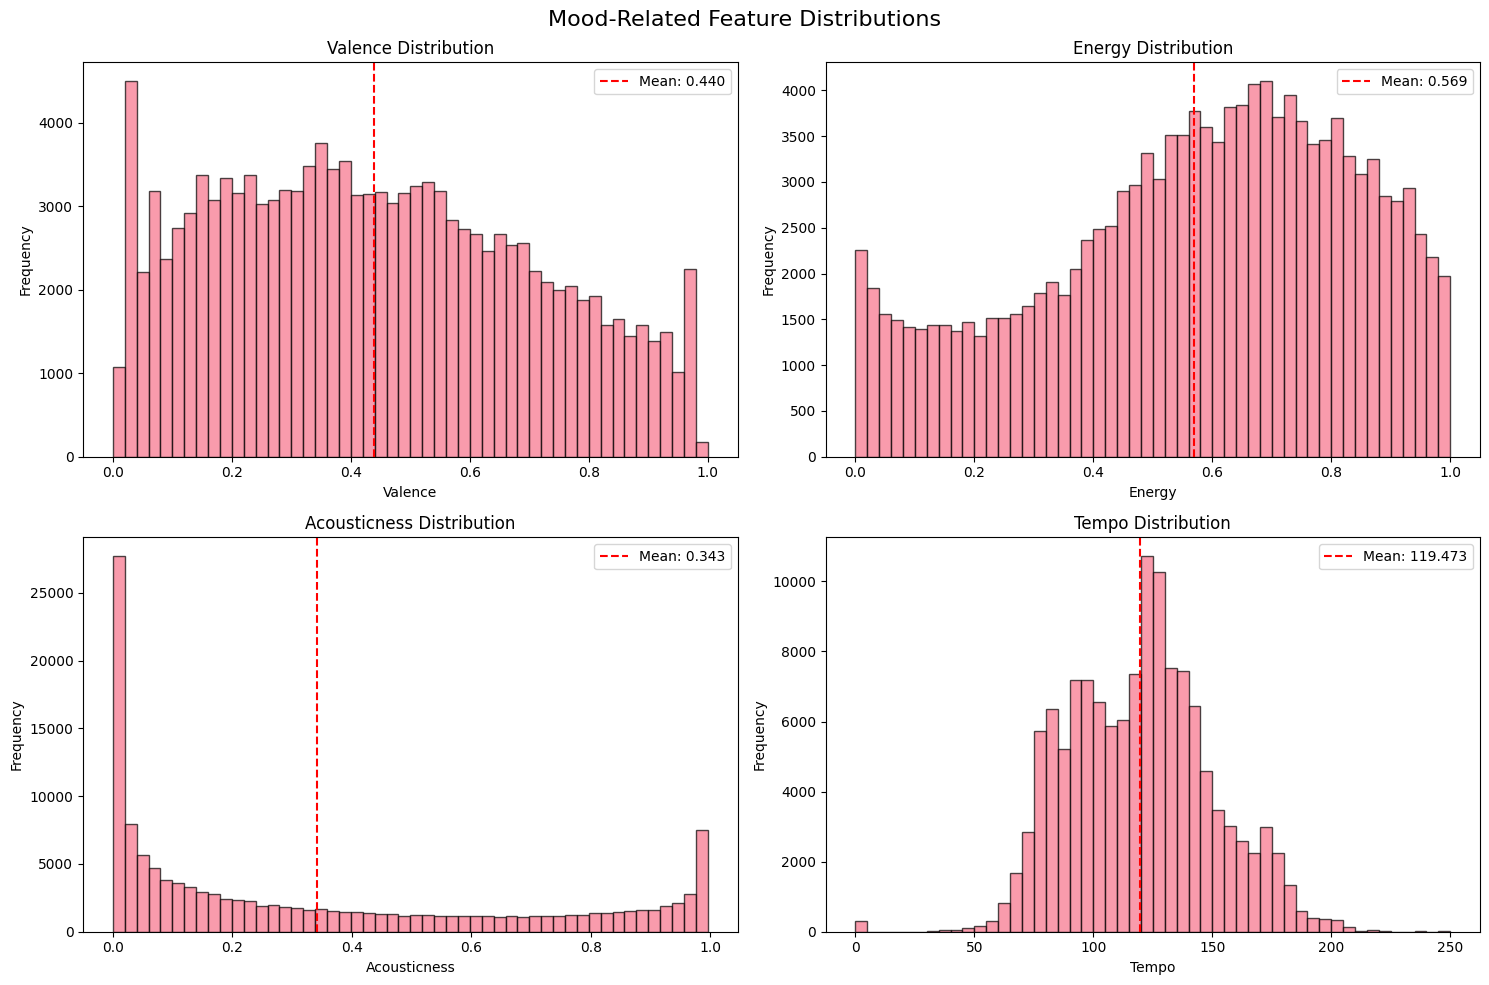

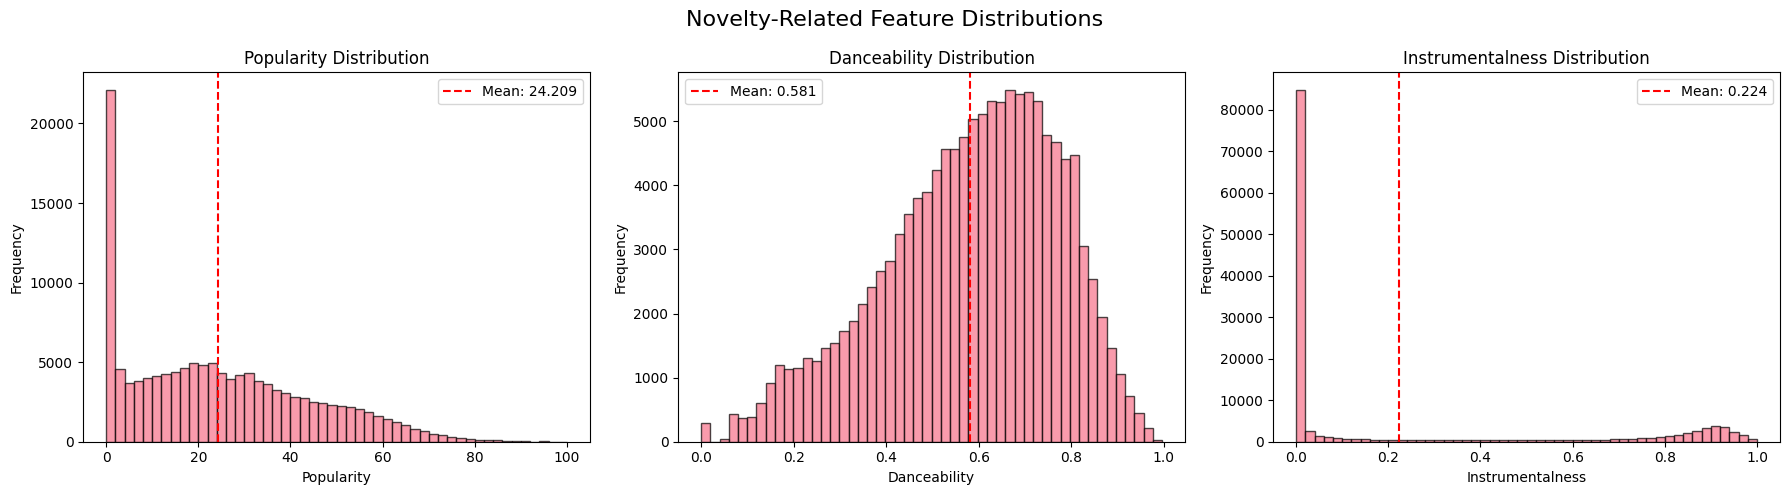


CORRELATION ANALYSIS
----------------------------------------


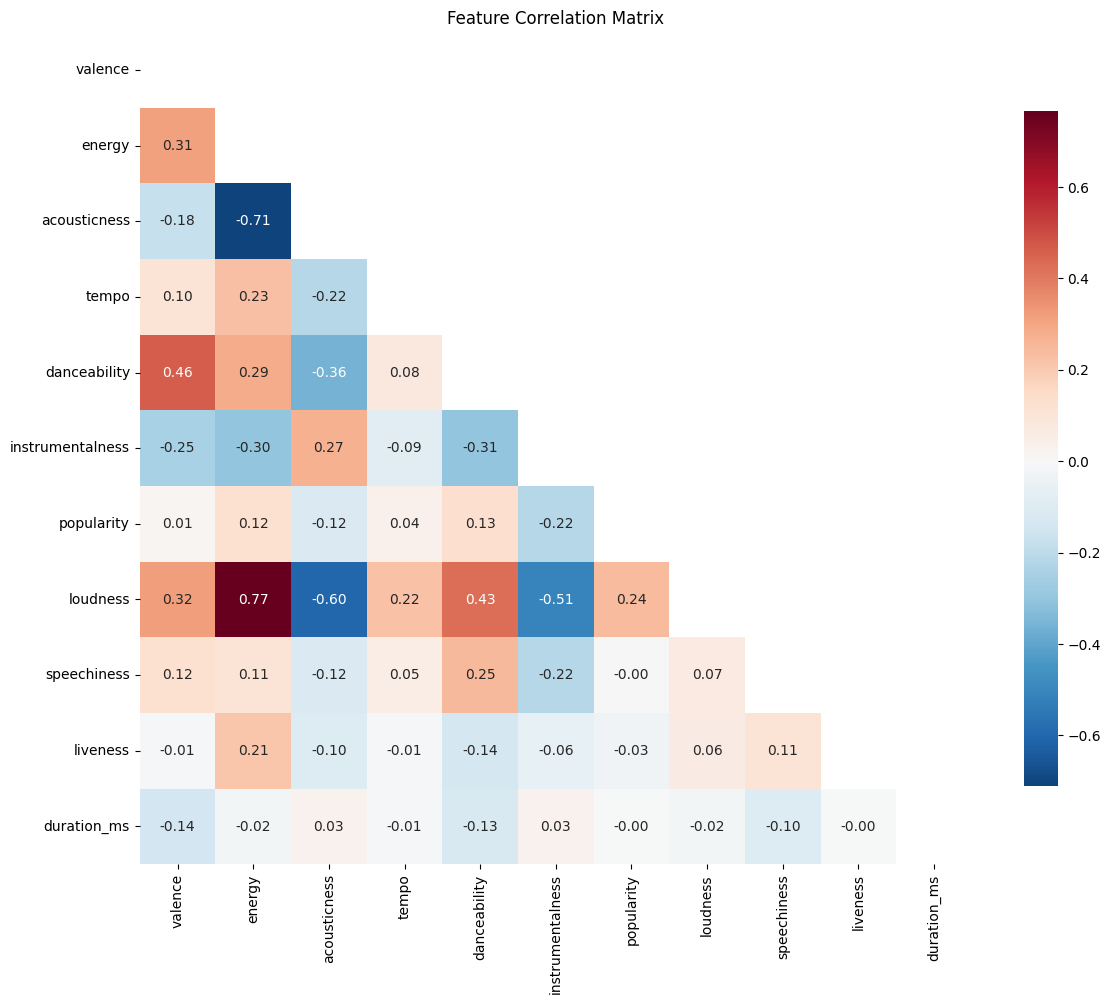

Strong Correlations (|r| > 0.5):
  energy ↔ loudness: 0.767
  energy ↔ acousticness: -0.710
  acousticness ↔ loudness: -0.603
  instrumentalness ↔ loudness: -0.509

GENRE ANALYSIS
----------------------------------------
Total unique genres: 27

Top 10 genres by track count:
genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Name: count, dtype: int64


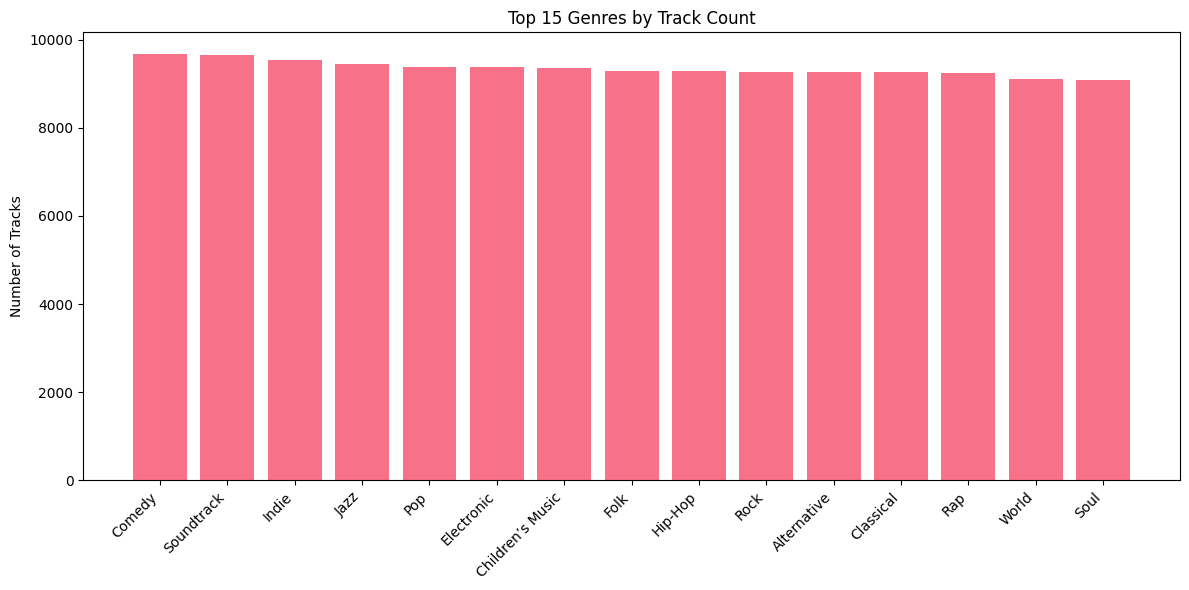

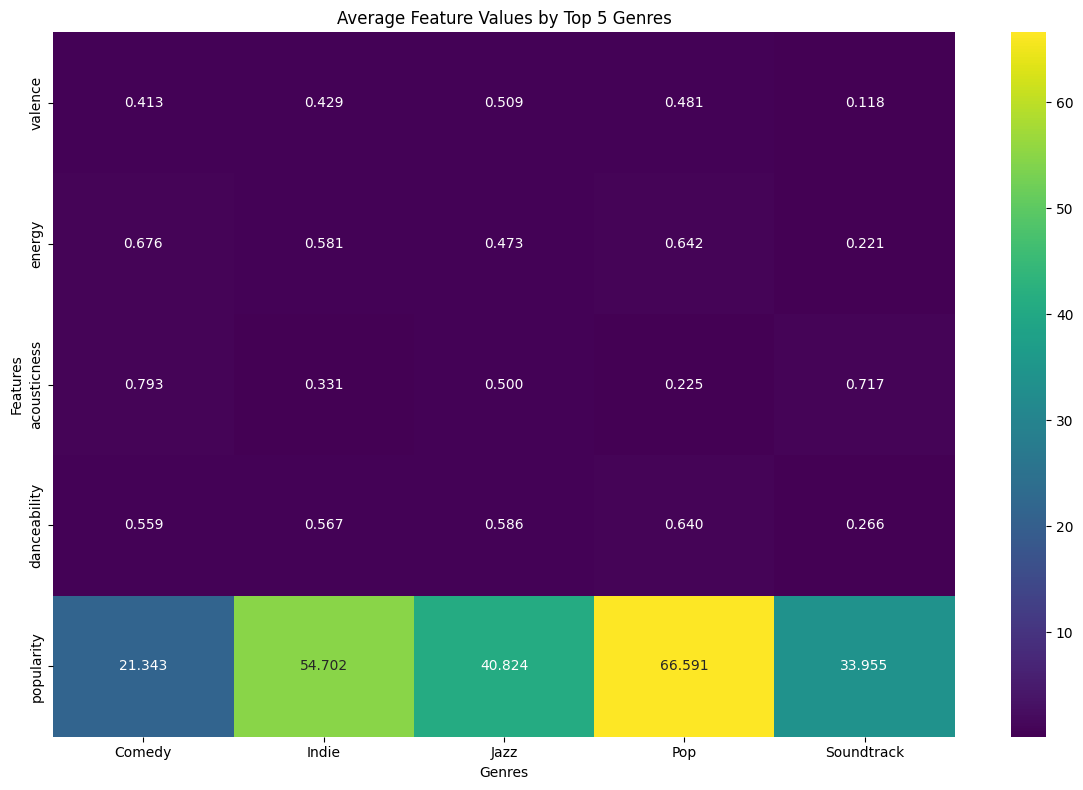


POPULARITY BIAS ANALYSIS
----------------------------------------
Popularity Statistics:
  Mean: 24.21
  Median: 22.00
  Std: 19.71
  Min: 0
  Max: 100


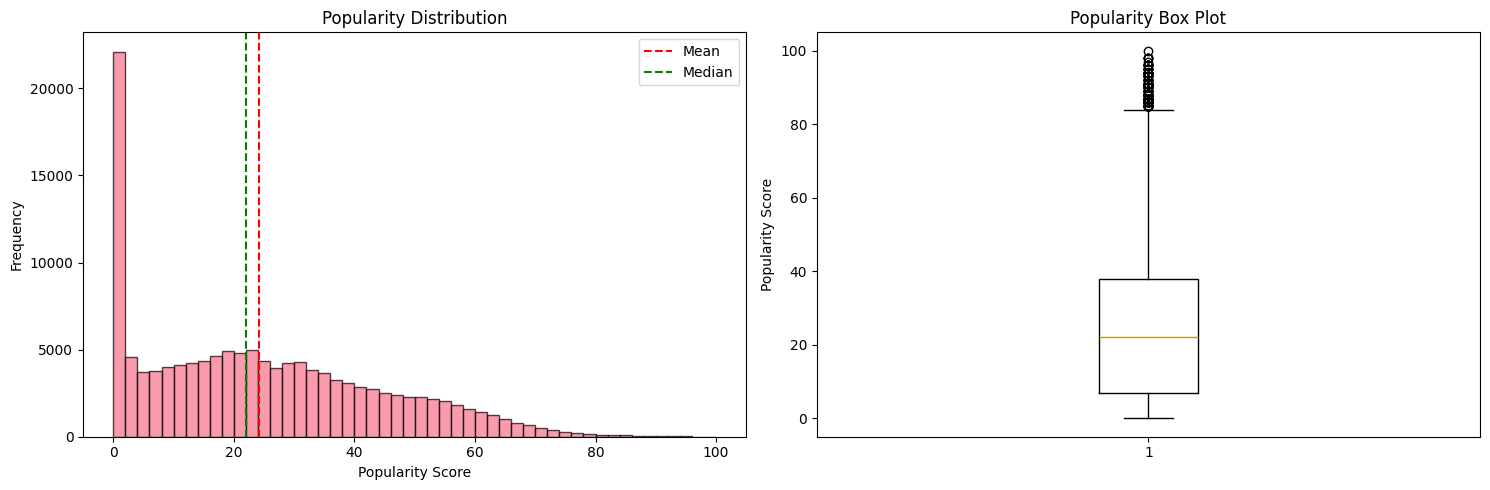


Bias Assessment:
  Low popularity tracks (<20): 60,425 (46.2%)
  High popularity tracks (>60): 6,455 (4.9%)

OUTLIER DETECTION
----------------------------------------
Valence: 0 outliers (0.00%)
Energy: 0 outliers (0.00%)
Acousticness: 0 outliers (0.00%)
Tempo: 542 outliers (0.41%)
Danceability: 307 outliers (0.23%)
Duration_Ms: 9,301 outliers (7.12%)


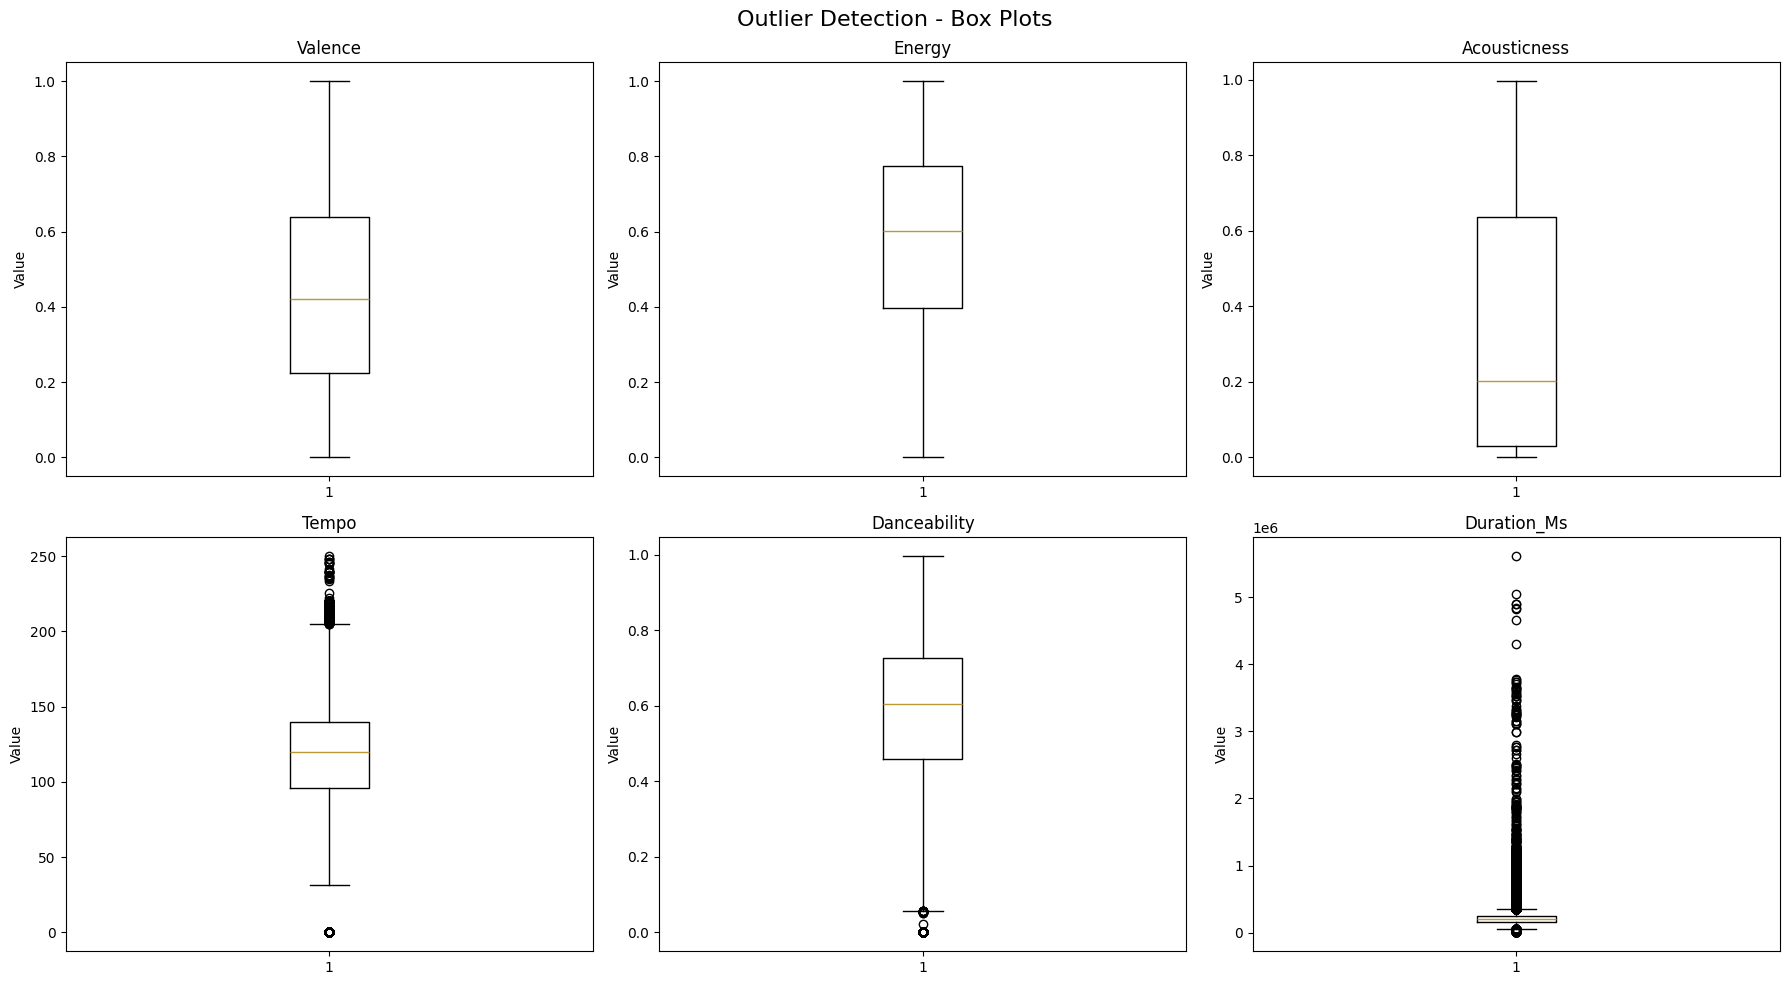


FEATURE SCALING ANALYSIS
----------------------------------------
Feature Ranges (for scaling assessment):
  Valence        : [0.000, 1.000] (range: 1.000)
  Energy         : [0.000, 1.000] (range: 1.000)
  Acousticness   : [0.000, 0.996] (range: 0.996)
  Tempo          : [0.000, 249.983] (range: 249.983)
  Danceability   : [0.000, 0.996] (range: 0.996)
  Instrumentalness: [0.000, 1.000] (range: 1.000)
  Loudness       : [-60.000, 1.806] (range: 61.806)
  Duration_Ms    : [3203.000, 5610020.000] (range: 5606817.000)

Recommendations:
  - Features with different scales detected
  - Recommend StandardScaler or MinMaxScaler for clustering
  - L2 normalization recommended for cosine similarity
TRACK OVERLAP ANALYSIS
Audio Features Dataset: 130,326 unique tracks
Tracks DB Dataset: 176,774 unique tracks

Common tracks (in both datasets): 15,275
Only in Audio Features: 115,051
Only in Tracks DB: 161,499

OVERLAP PERCENTAGES:
Audio Features coverage: 11.7%
Tracks DB coverage: 8.6%

Total uniq

In [42]:
common_tracks = run_complete_eda(df_audio, df_tracks)